In [1]:
import pandas as pd

In [2]:
cd /Users/Marco/Documents/CSC 478/data

/Users/Marco/Documents/CSC 478/data


In [3]:
bank_DF = pd.read_csv("bank_data.csv",index_col=0)

## __2a.__
__Preprocessing the data which includes:__
- separating the target attribute
- converting to the standard spreadsheet format
- separating the test and training data

In [9]:
bank_record = bank_DF[bank_DF.columns[0:-1]]
bank_target = bank_DF[bank_DF.columns[-1]]

In [10]:
bank_record_ssf=pd.get_dummies(bank_record)

In [16]:
from sklearn.cross_validation import train_test_split
bank_train,bank_test,bank_target_train,bank_target_test = train_test_split(bank_record_ssf, bank_target, test_size=0.2, random_state=33)

## __2b.__
- Normalize the data
- Use sklearn's KNN classifier

In [20]:
from sklearn import preprocessing

In [22]:
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm  = min_max_scaler.transform(bank_train) 
bank_test_norm   = min_max_scaler.transform(bank_test)

In [23]:
from sklearn import neighbors, tree, naive_bayes

In [27]:
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors,weights='distance')
knnclf.fit(bank_train_norm,bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [63]:
knnpred_test = knnclf.predict(bank_test_norm)
print knnpred_test

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [33]:
import sklearn.metrics as metrics

__Classifaction Report for KNN Classifier__

In [36]:
print (metrics.classification_report(bank_target_test,knnpred_test))

             precision    recall  f1-score   support

         NO       0.68      0.73      0.70        66
        YES       0.63      0.57      0.60        54

avg / total       0.66      0.66      0.66       120



__Confusion Matrix for KNN Classifier__

In [39]:
knncm = (metrics.confusion_matrix(bank_target_test, knnpred_test))
print knncm

[[48 18]
 [23 31]]


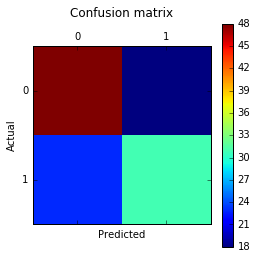

In [62]:
plt.matshow(knncm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__The average accuracy score across test instances__

In [60]:
print knnclf.score(bank_test_norm,bank_target_test)

0.658333333333


__The average accuracy score across training data__

In [61]:
print knnclf.score(bank_train_norm,bank_target_train)

1.0


In [76]:
for i in range(1,21):
    knnclf = neighbors.KNeighborsClassifier(i,weights='distance')
    knnclf.fit(bank_train_norm,bank_target_train)
    knnpred_test = knnclf.predict(bank_test_norm)
    score = knnclf.score(bank_test_norm,bank_target_test)
    print "K=%s, Score = %s"%(i,score) 
    

K=1, Score = 0.633333333333
K=2, Score = 0.633333333333
K=3, Score = 0.641666666667
K=4, Score = 0.641666666667
K=5, Score = 0.658333333333
K=6, Score = 0.65
K=7, Score = 0.65
K=8, Score = 0.633333333333
K=9, Score = 0.65
K=10, Score = 0.65
K=11, Score = 0.65
K=12, Score = 0.625
K=13, Score = 0.616666666667
K=14, Score = 0.625
K=15, Score = 0.633333333333
K=16, Score = 0.65
K=17, Score = 0.675
K=18, Score = 0.683333333333
K=19, Score = 0.65
K=20, Score = 0.625


When K=18, the score is the highest. There's not much variance though. Overall it would appear that KNN doesn't work very well for this data set, whereas the decision is very good. 

## __2c.__
__Experimenting with:__
- decision tree
- naive Bayes(Gaussian)
__For each classifier generate:__
- confusion matrix
- classification report 
- average accuracy scores

In [42]:
treeclf = tree.DecisionTreeClassifier(criterion = 'entropy',min_samples_split=3)

In [43]:
treeclf=treeclf.fit(bank_train,bank_target_train)

In [45]:
treepreds_test = treeclf.predict(bank_test)
print treepreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


__The average accuracy score across test instances__

In [46]:
print treeclf.score(bank_test,bank_target_test)

0.816666666667


__The average accuracy score across target data__

In [47]:
print treeclf.score(bank_train,bank_target_train)

0.9875


__Classifaction Report for Decision Tree__

In [50]:
print(metrics.classification_report(bank_target_test,treepreds_test))

             precision    recall  f1-score   support

         NO       0.81      0.86      0.84        66
        YES       0.82      0.76      0.79        54

avg / total       0.82      0.82      0.82       120



__Confusion Matrix for Decision Tree__

In [53]:
treecm = metrics.confusion_matrix(bank_target_test,treepreds_test,labels=['YES','NO'])
print treecm

[[41 13]
 [ 9 57]]


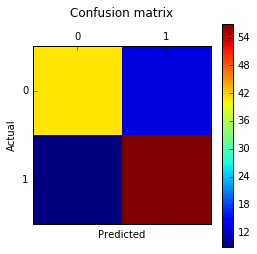

In [55]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train,bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print nbpreds_test

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


__Classification Report for naive Bayes__

In [64]:
print(metrics.classification_report(bank_target_test,nbpreds_test))

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



__Confusion Matrix for naive Bayes__

In [65]:
nb_cm = metrics.confusion_matrix(bank_target_test,nbpreds_test,labels=['YES','NO'])
print nb_cm

[[22 32]
 [17 49]]


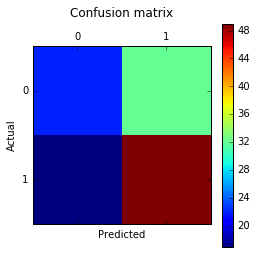

In [66]:
plt.matshow(nb_cm)
plt.title('Confusion matrix\n')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__The average accuracy score across test instances__

In [59]:
print nbclf.score(bank_test, bank_target_test)

0.591666666667


__The average accuracy score across training data__

In [58]:
print nbclf.score(bank_train,bank_target_train)

0.65625


The bias-variance trade off is a problem where you have to find a way to simultaneously reduce bias and variance. So with models that have small variance and high bias _underfit_ the truth target. Models that exhibit high variance and low bias overfit the truth target. 

## __2d.__
The decision tree scored highest across the board having a higher a precision/recall score and as a result a higher F1 score. Taking a look at the confusion matrixes from each classifier is also an easy way to see the relationship between actual and predicted results. 